In [1]:
import jieba as jb,  numpy as np, os, pandas as pd, random, re
import matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from snownlp import SnowNLP

In [3]:
stopwords = [',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', 
             '（', '）', ',', ':', 'hi', 'auntie', 'ok', '向左走', '向右走', '大家', '利申', 
             '雖然', '但係', '乜', '一齊', '可以', '應該', '好多', '已經', '因為', '邊個',
             '好似', '而家', '一定', '之前', '即刻', '好過', '仲有', '如果', '其實', '一半',
             '有人', '個人', '一次', '無人', '好好', '根本', '一樣', '成日', '問題', '不過',
             '有時', '之後', '沒有', '所以', '不如', '個個', '無法']

In [4]:
data_files = ['./input/golden_response_6845074.csv']

In [5]:
df = pd.read_csv(data_files[0])

In [6]:
sents = df.response.values

In [7]:
print(sents)

['周庭都唔支持' '算啦|泛民成班傻的嗎勁|圍內分豬肉|關其他人咩事？|今日仲係新世紀出面鬼殺咁嘈|話自己要抗衡建設|真係人唔笑|狗都吠'
 '遠離泛民 背信棄義 個人利益' '你呢個支持者,連周庭唔使初選都唔知?|想知結果? 聽D100 睇毒果, 一個月前已知邊個win' '聽日下嘛'
 '聽講廣告界有句名言就係|千祈唔好擺晒d plan畀個客揀|我唔明初選開放畀選民投做咩|虛怯到咁' '投乜向左走向右走呀麻向左走向右走煩'
 '得九西同新界東至有|好多高登仔係新界西' '新東表示投佢老母閪|入場費要八萬五|戇向左走向右走勁' '投唔投都無分別。']


In [8]:
sents_list = []
for sent in sents:
    if not isinstance(sent, str):
        continue
    sent = sent.split('|')
    for s in sent:
        for stopword in stopwords:
            s = s.replace(stopword, '')
        sents_list.append(s)
data = pd.DataFrame(sents_list, columns=['Sent'])

In [9]:
data

,Sent
0,周庭都唔支持
1,算啦
2,泛民成班傻的嗎勁
3,圍內分豬肉
4,關其他人咩事
5,今日仲係新世紀出面鬼殺咁嘈
6,話自己要抗衡建設
7,真係人唔笑
8,狗都吠
9,遠離泛民 背信棄義 利益


In [10]:
sentiments = []
for s in data.Sent.values:
    sn = SnowNLP(s)
    print(sn.words)
    #print(sn.keywords(3))
    #print(sn.summary(2))
    #print(sn.sentences)
    #print(sn.words)
    sentiments.append(sn.sentiments)
data['Sentiments'] = sentiments

['周庭', '都唔', '支持']
['算', '啦']
['泛', '民', '成班', '傻', '的', '嗎', '勁']
['圍內', '分豬肉']
['關', '其', '他人', '咩', '事']
['今日', '仲係', '新', '世', '紀出', '面', '鬼', '殺', '咁', '嘈']
['話', '自己', '要', '抗衡', '建', '設']
['真係', '人', '唔笑']
['狗', '都', '吠']
['遠', '離泛', '民', '背信', '棄', '義', '利益']
['你', '呢', '個', '支持者', '連', '周庭', '唔', '使初', '選', '都', '唔', '知']
['想知', '結果', '聽', 'D100', '睇毒', '果', '一個', '月', '前', '已', '知', 'win']
['聽日', '下', '嘛']
['聽講廣告', '界', '有', '句', '名言', '就係']
['千', '祈唔', '好', '擺', '晒', 'd', 'plan', '畀個', '客', '揀']
['我', '唔明', '初', '選開放畀選', '民', '投', '做咩']
['虛', '怯', '到咁']
['投呀', '麻', '煩']
['得', '九西', '同新界', '東至', '有']
['高', '登', '仔係', '新界', '西']
['新東', '表', '示', '投佢', '老', '母', '閪']
['入場費', '要', '八萬', '五']
['戇', '勁']
['投唔', '投都', '無', '分別']


In [11]:
data

,Sent,Sentiments
0,周庭都唔支持,0.576417
1,算啦,0.576570
2,泛民成班傻的嗎勁,0.171368
3,圍內分豬肉,0.473767
4,關其他人咩事,0.681148
5,今日仲係新世紀出面鬼殺咁嘈,0.984879
6,話自己要抗衡建設,0.433817
7,真係人唔笑,0.518198
8,狗都吠,0.572431
9,遠離泛民 背信棄義 利益,0.507074


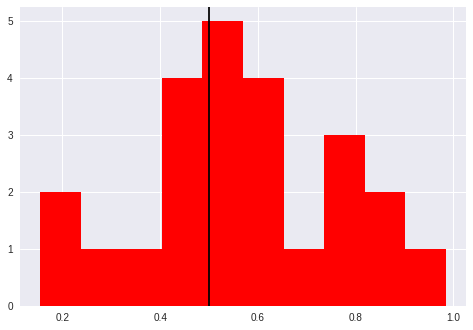

In [12]:
data['Sentiments'].hist(color='r')
plt.axvline(x=0.5, c='k')
plt.show()

In [13]:
data['p/n'] = data['Sentiments'].apply(lambda x: 1 if x > 0.5 else -1)

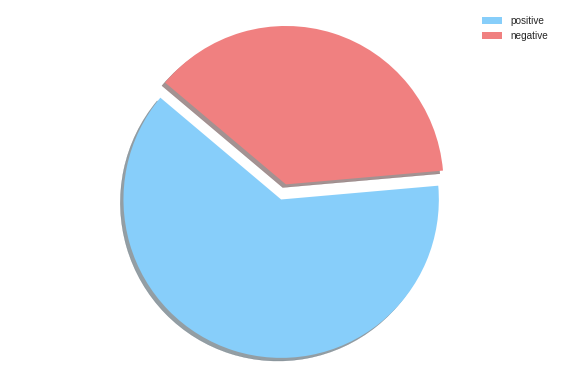

In [14]:
labels = ['positive', 'negative']
sizes = [len(data[data['p/n']==1])/len(data), len(data[data['p/n']==-1])/len(data)]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

patches, text = plt.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=140)
plt.axis('equal')
plt.legend(patches, labels, loc='best')
plt.tight_layout()
plt.show()

In [15]:
sents_list = []
data_files = []
folder = './input/'
for subdir, dirs, files in os.walk(folder):
    for f in files:
        data_files.append(subdir + f)
for f in data_files:
    df = pd.read_csv(f)
    sents = df.response.values
    for sent in sents:
        if not isinstance(sent, str):
            continue
        sent = sent.replace('，', '|').replace('。', '|').replace(',', '|').replace('.', '|').split('|')
        for s in sent:
            sents_list.append(s)
data = pd.DataFrame(sents_list, columns=['Sent'])
sentiments = []
for s in data.Sent.values:
    try:
        sn = SnowNLP(s)
        sentiments.append([s, sn.sentiments])
    except:
        pass
data = pd.DataFrame(sentiments, columns=['Sentences', 'Sentiments'])

In [16]:
data[data.Sentiments >= 0.999]

,Sentences,Sentiments
546,早年畢業於中華基督教青年會中學以及蒙納許大學[註 2]她原本擔任新民黨海怡社區發展主任,0.999266
548,023票擊敗民主黨單仲偕及人民力量主席袁彌明當選,0.999109
965,想奶想奶想奶想奶,0.999950
1527,這家名叫Bamboozle的亞洲風餐廳是由名叫菲利普·克拉爾的澳洲人所開,0.999871
1701,東亞班懵豬眼就留返係自己地方圍埋黎賤啦！係都要死去人地文明社會咪抵比人笑,0.999938
2205,第5名：希絲緹娜·菲伊貝爾（《不正經的魔術講師與禁忌教典》）,0.999918
3492,晴報d野我一向好懷疑係咪真,0.999742
3612,我望唔清究竟呢個世界仲有幾多野我係掌握到,0.999931
4220,原來埋藏著許多不可告人的秘密……電影完場後,0.999452
4244,唔好蛇王、唔好偷原子筆、唔好…,0.999419


In [17]:
data[data.Sentiments <= 0.001]

,Sentences,Sentiments
685,在選舉論壇爆出「CY就係太完美」、「我諗佢見到我會即刻縮」等金句而聲名大噪,0.000272
1024,最近林志玲同Baby一齊參與大陸嘅綜藝節目《王者進擊》,0.000961
1551,網友 @Julian Liew-Young回應說：“我敢保證大多數新西蘭的亞洲人都不會覺得這...,0.000962
2028,去年11月被《東周刊》踢爆與凸腩兼有案底的陳志遠（Stephen）拍拖,0.000898
2323,他2016年3月到5月間並沒有前往香○兒汽車旅館,0.000481
2400,鬼佬見證呢廿年温水煮蛙 之前先有個鄉里被拒入境 出篇文抒發下情懷你都嬲 真係要到肥彭都原機遣...,0.000492
2481,4個都差唔多樣 無所謂啦,0.000632
2731,指塌陷位置為基坑支護體,0.000500
4199,你們就放棄一個人才？」經理續說：「小事？我們並不認為這是小事,0.000634
4672,小弟工作的蚊型公司最近買了架16年水貨豐田Alphard 買入大約57萬 月供大約萬幾蚊,0.000210


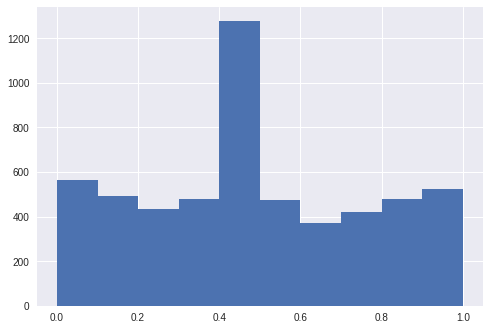

In [18]:
data.Sentiments.hist()
plt.show()

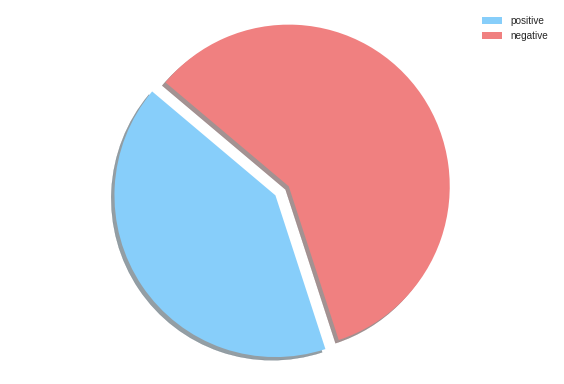

In [19]:
data['p/n'] = data['Sentiments'].apply(lambda x: 1 if x > 0.5 else -1)
labels = ['positive', 'negative']
sizes = [len(data[data['p/n']==1])/len(data), len(data[data['p/n']==-1])/len(data)]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

patches, text = plt.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=140)
plt.axis('equal')
plt.legend(patches, labels, loc='best')
plt.tight_layout()
plt.show()